# Problem 1 (20 Points Total): 

## (10 points) Importing the MovieLens Data Set and Merging It into a Single Pandas DataFrame

* (2 Points) Download the 1 million ratings data set from the MovieDataSet.zip on Canvas
* (5 Points) Merge all of the data into a single Pandas DataFrame
* (3 Points) Store the data into an HDF5 file.

## (10 points) Report Some Basic Details of the Data You Collected.  For example:

*  (2 Points) How many movies have an average rating over 4.5 overall?
*  (2 Points) How many movies have an average rating over 4.5 among men?  How about women?
*  (2 Points) How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  (2 Points) What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  (2 Points) Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


### (10 points) Importing the MovieLens Data Set and Merging It into a Single Pandas DataFrame

#### (2 points) Download the 1 million ratings data set from the MovieDataSet.zip on Canvas

In [235]:
#Inclusing essential python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
#Reading the data into dataframe

kwargs = {'sep': '::', 'header': None, 'engine': 'python', 'encoding': 'latin-1'}

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('MovieDataSet/users.dat', names=unames, **kwargs)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('MovieDataSet/ratings.dat', names=rnames, **kwargs)


mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('MovieDataSet/movies.dat', names=mnames, **kwargs)

#### (5 Points) Merge all of the data into a single Pandas DataFrame

In [237]:
#Merging all the data into a single DataFrame

data = pd.merge(pd.merge(ratings, users), movies)

#### (3 Points) Store the data into an HDF5 file.

In [238]:
#Storing the mereged dataframe into hdf5 file
data.to_hdf("MovieDataSet/MergedData.h5", "/data/d1");

In [239]:
#Reading the data from a hdf5 file
data= pd.read_hdf("MovieDataSet/MergedData.h5", "/data/d1");

### (10 points) Report Some Basic Details of the Data You Collected. For example:

#### (2 Points) How many movies have an average rating over 4.5 overall?

In [240]:
# Function for getting counts of movies with average rating of over 4.5

def get_count_mov_over_4_5_mean(df) -> int:
    
    t = df.groupby(by='movie_id').mean().reset_index()
    return t[t.rating > 4.5].shape[0]

In [241]:
print(get_count_mov_over_4_5_mean(data),"movies have an average rating over 4.5 overall." )

21 movies have an average rating over 4.5 overall.


#### (2 Points) How many movies have an average rating over 4.5 among men? How about women?

In [242]:
ans = get_count_mov_over_4_5_mean(data[data.gender == 'M'])
print( ans ,"movies have an average rating over 4.5 among men.")

23 movies have an average rating over 4.5 among men.


In [243]:
ans = get_count_mov_over_4_5_mean(data[data.gender == 'F'])
print( ans ,"movies have an average rating over 4.5 among women.")

51 movies have an average rating over 4.5 among women.


#### (2 Points) How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?

In [244]:
# Function for getting counts of movies with median rating of over 4.5
def get_count_mov_over_4_5_med(df) -> int:
    
    t = df.groupby(by='movie_id').median().reset_index()
    return t[t.rating > 4.5].shape[0]

In [245]:
ans = get_count_mov_over_4_5_med(data[(data.gender == 'M') & (data.age > 30)])

print(ans, "movies have a median rating over 4.5 among men over age 30.")

86 movies have a median rating over 4.5 among men over age 30.


In [246]:
ans = get_count_mov_over_4_5_med(data[(data.gender == 'F') & (data.age > 30)])

print(ans, "movies have a median rating over 4.5 among women over age 30.")

149 movies have a median rating over 4.5 among women over age 30.


#### (2 Points) What are the ten most popular movies?
##### - Choose what you consider to be a reasonable defintion of "popular".
##### - Be perpared to defend this choice.

##### Our reason for the most popular movie is that it must be the most viewed movie i.e. count of reviews each movie has received. 

##### Rating does not always mean popular because a movie with a bad rating may create a lot of negative publicity which may arouse interest in lot of people. 

In [247]:
#Grouping data by movie names and getting count of each group
temp = data.groupby(['title','genres']).count()

#Keeping only one column age, which we rename into count cause that makes more sense
temp = pd.DataFrame(temp.age).reset_index()
temp.rename(columns={'age': 'count'}, inplace=True)

#Sorting it into descending order and returning top 10 the movie with maximum count
temp.sort_values(by='count', ascending=False).head(10)


,title,genres,count
127,American Beauty (1999),Comedy|Drama,3428
3153,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,2991
3154,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,2883
1789,Jurassic Park (1993),Action|Adventure|Sci-Fi,2672
2894,Saving Private Ryan (1998),Action|Drama|War,2653
3293,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,2649
2112,"Matrix, The (1999)",Action|Sci-Fi|Thriller,2590
258,Back to the Future (1985),Comedy|Sci-Fi,2583
2990,"Silence of the Lambs, The (1991)",Drama|Thriller,2578


In [248]:
#Proving that high average rating does not always mean 'popular' movie
temp=data[data.title == 'Baby, The (1973)']
temp[['title','rating']]

,title,rating
871322,"Baby, The (1973)",5


##### As it can be seen above that average rating of 'Baby, The (1973)' is 5 but only one person has reviewed it

#### (2 Points) Make some conjectures about how easy various groups are to please? Support your answers with data!
##### For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children. This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
##### Be sure to come up with your own conjectures and support them with data!

##### Conjecture 1: Males are more into Action movies
##### Conjecture 2: Females are more into Romance movies

In [249]:
# Lets see if we could create a dataset where count of males and females are same
num_female_reviews = data[data.gender == 'F'].shape[0]

# Lets sample same number of male reviews in random and create a new dataset
balanced = pd.concat([
    data[data.gender == 'F'], # Female only reviews
    data[data.gender == 'M'].sample(num_female_reviews) # Male only reviews
                                                        # with same number as females
])

balanced.shape

(492880, 10)

##### So our new balanced dataset contains 492880 many rows...Let's see how the countplot is now.

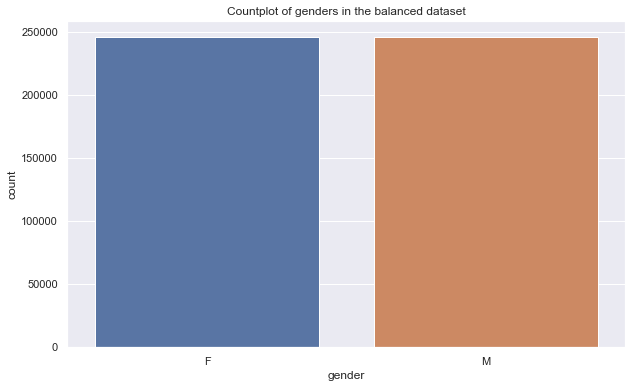

In [250]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.countplot(x=balanced.gender)
plt.title("Countplot of genders in the balanced dataset")
plt.show()

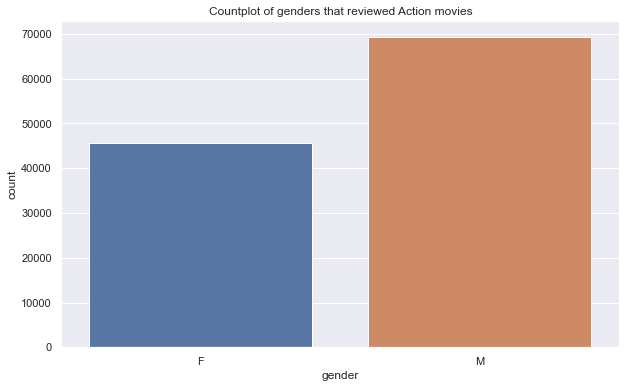

In [251]:
# Conjecture 1: Males are more into Action movie
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.countplot(x=balanced[balanced.genres.str.contains('Action')].gender)
plt.title("Countplot of genders that reviewed Action movies")
plt.show()

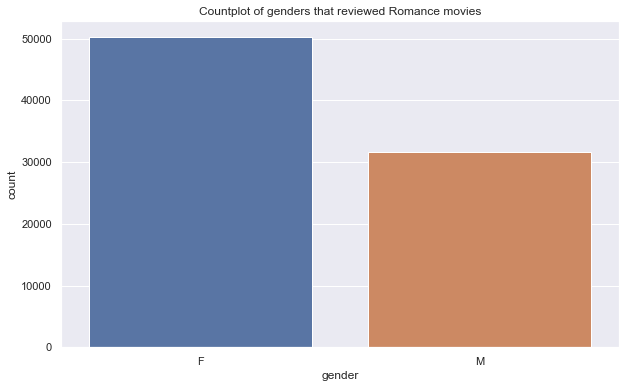

In [252]:
#Conjecture 2: Females are more into Romance movies

plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.countplot(x=balanced[balanced.genres.str.contains('Romance')].gender)
plt.title("Countplot of genders that reviewed Romance movies")
plt.show()

# Problem 2 (20 Points Total): Expand Our Investigation to Histograms

* (2 Points) Plot a histogram of the ratings of all movies.
* (2 Points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 Points) Plot a histogram of the *average rating* for each movie.
* (6 Points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 Points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

#### (2 Points) Plot a histogram of the ratings of all movies.


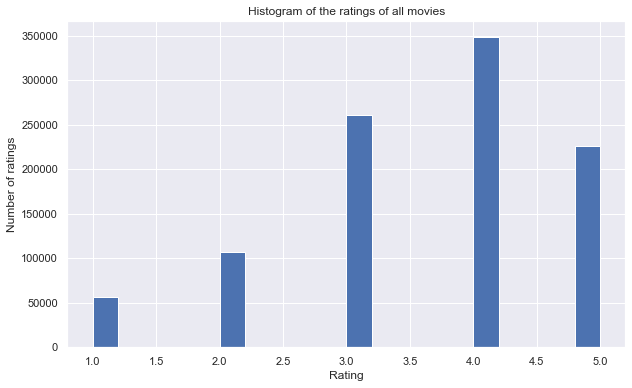

In [253]:
# Actual method to render a histogram
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
plt.hist(data.rating, bins=20)

# Adding titles
plt.title('Histogram of the ratings of all movies')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.show()

#### (2 Points) Plot a histogram of the number of ratings each movie recieved.

<Figure size 720x432 with 0 Axes>

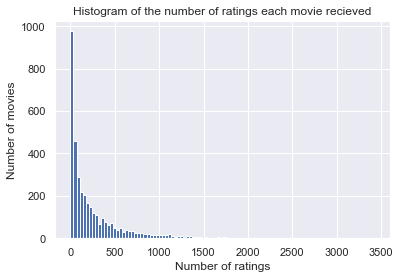

In [254]:
# Plotting histogram of the number of ratings each movie received

temp=data.groupby('title').count().reset_index()
temp=temp[['title','rating']]

plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
temp.hist(column='rating',bins=100)
plt.title('Histogram of the number of ratings each movie recieved')
plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.show()

#### (2 Points) Plot a histogram of the average rating for each movie.

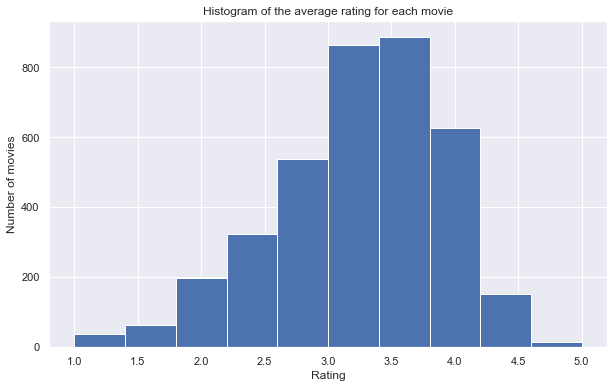

In [255]:
# Plotting histogram of the average of ratings each movie recieved
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
movie_wise_mean_rating = data.groupby('movie_id').mean().rating
plt.hist(movie_wise_mean_rating)
plt.title('Histogram of the average rating for each movie')
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.show()

#### (6 Points) Plot a histogram of the average rating for movies which are rated more than 100 times.
#### What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
#### Which highly rated movies would you trust are actually good? Those rated more than 100 times or those rated less than 100 times?

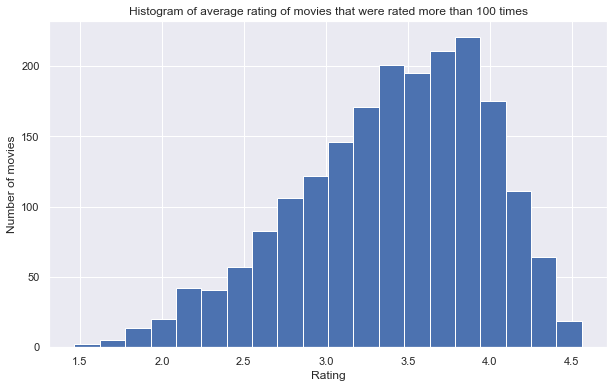

In [256]:
# Count of movies being rated
temp = data.movie_id.value_counts()
# Like a dataframe we can refine a series like this as well
mids = temp[temp > 100].index

# Selecting only those movie ids that're in the list `mids`
gt_100_rats = data[data.movie_id.isin(mids)]

# Drawing histogram

plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
plt.hist(x=gt_100_rats.groupby(by='movie_id').mean().rating,bins=20)
plt.title('Histogram of average rating of movies that were rated more than 100 times')
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.show()

##### We would chose those rated more than 100 times because a movie rated only 1 time can also have a 5 star rating

##### We also observe that histogram of the average rating for movies which are rated more than 100 times is a bit more left skewed. Thus the mean is less than that of median.

#### (8 Points) Make some conjectures about the distribution of ratings? Support your answers with data!
#### For example, what age range do you think has more extreme ratings? Do you think children are more or less likely to rate a movie 1 or 5?
#### Be sure to come up with your own conjectures and support them with data!

Conjecture 1: Age group 56 are more into Film-Noir movies

Conjecture 2: Age group 1 are more into Children's movies

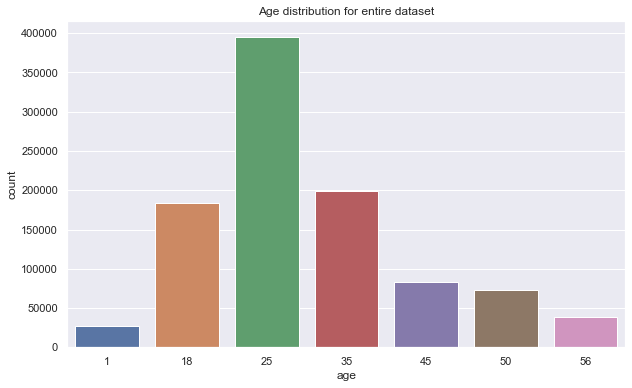

In [257]:
#Plotting the age brackets for entire dataset
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.countplot(x=data.age)
plt.title("Age distribution for entire dataset")
plt.show()

In [258]:
# Lets see if we could create a dataset where count of males and females are same
age_1 = data[data.age == 1].shape[0]

# Lets sample same number of age in random and create a new dataset
balanced = pd.concat([
    data[data.age == 1],
    data[data.age == 18].sample(age_1),
    data[data.age == 25].sample(age_1),
    data[data.age == 35].sample(age_1),
    data[data.age == 45].sample(age_1),
    data[data.age == 50].sample(age_1),
    data[data.age == 56].sample(age_1)
                                                       
])

balanced.shape

(190477, 10)

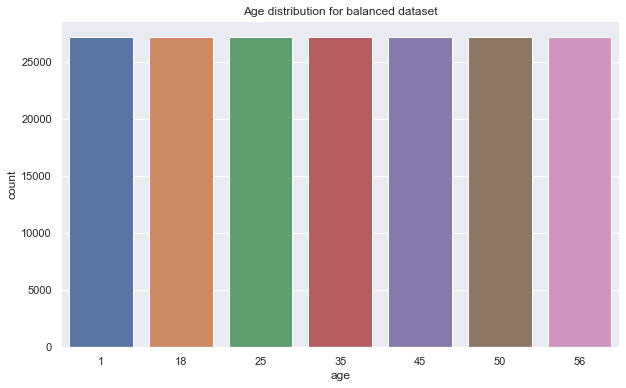

In [259]:
#Plotting the age brackets for the balanced dataset
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.countplot(x=balanced.age)
plt.title("Age distribution for balanced dataset")
plt.show()

Conjecture 1: Age group 56 are more into Film-Noir movies

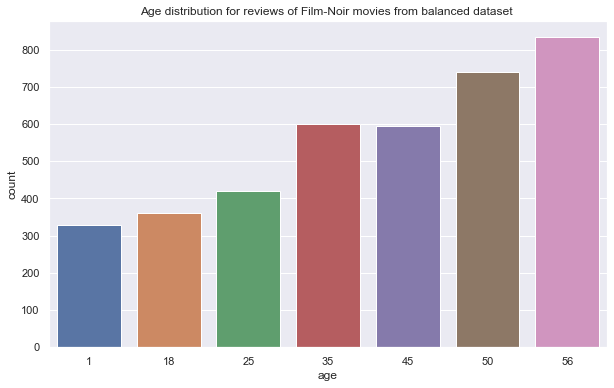

In [260]:
#Creating a subset of the dataframe only for Film-Noir movies
temp=balanced[balanced.genres.str.contains('Film-Noir')]

#Plotting the age brackets for only movies with genre Film-Noir
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.countplot(x=temp.age)
plt.title("Age distribution for reviews of Film-Noir movies from balanced dataset ")
plt.show()

Conjecture 2: Age group 1 are more into Children's movies

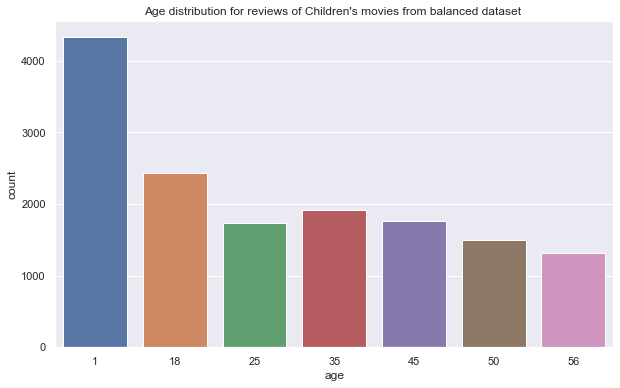

In [261]:
#Creating a subset of the dataframe only for Children's movies
temp=balanced[balanced.genres.str.contains("Children's")]

#Plotting the age brackets for only movies with genre Film-Noir
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.countplot(x=temp.age)
plt.title("Age distribution for reviews of Children's movies from balanced dataset ")
plt.show()

# Problem 3: (20 Points Total): Correlation - Men versus Women

Let look more closely at the relationship between the pieces of data we have.

* (2 Points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 Points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 Points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 Points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

#### (2 Points) Make a scatter plot of men versus women and their mean rating for every movie.

In [262]:
# To make this plot we would require a dataframe like the following

'''
____________________________________________
| movie_id | mean_F_rating | mean_M_rating |
++++++++++++++++++++++++++++++++++++++++++++
|    X     |     aa        |      bb       |
--------------------------------------------
|    Y     |     cc        |      dd       |
--------------------------------------------
'''
f_rating_dict = data[data.gender == 'F'].groupby('movie_id').mean().rating.to_dict()
m_rating_dict = data[data.gender == 'M'].groupby('movie_id').mean().rating.to_dict()

In [263]:
# Creating a new DataFrame like we documented above
# Getting started with just the unique movie_ids

temp = pd.DataFrame(data.movie_id.unique(),columns=['movie_id'])

# Creating attributes
# mean_F_rating, mean_M_rating

# If movie_id not found in the dictionary, return np.nan
temp['mean_F_rating'] = temp.movie_id.apply(lambda mov_id: f_rating_dict.get(mov_id, np.nan))
temp['mean_M_rating'] = temp.movie_id.apply(lambda mov_id: m_rating_dict.get(mov_id, np.nan))

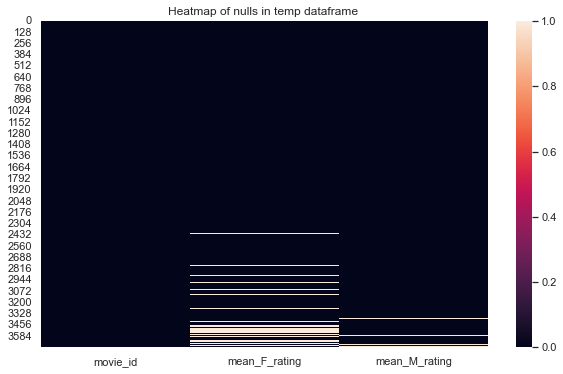

In [264]:
# Let's see the nulls in this newly created DataFrame
plt.figure(figsize=(10,6))
sns.heatmap(pd.isna(temp))
plt.title('Heatmap of nulls in temp dataframe ')
plt.show()

In [265]:
# Using only those rows which doesn't have any nulls
no_nulls_temp = temp[                 # Inversing the boolean signs using ~
    (~pd.isna(temp.mean_F_rating)) &  # Rows where mean_F_rating has no nulls
    (~pd.isna(temp.mean_M_rating))    # Rows where mean_M_rating has no nulls
]
no_nulls_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3446 entries, 0 to 3691
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       3446 non-null   int64  
 1   mean_F_rating  3446 non-null   float64
 2   mean_M_rating  3446 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 107.7 KB


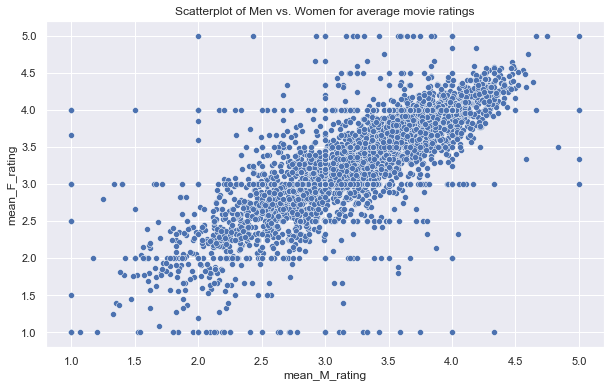

In [266]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.scatterplot(x='mean_M_rating', y='mean_F_rating', data=no_nulls_temp)
plt.title('Scatterplot of Men vs. Women for average movie ratings')
plt.show()

#### (2 Points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times

In [267]:
# Creating a dataframe 

# Movies that were rated more than 200 times

t = data.movie_id.value_counts()
gt_200_mov_ids = t[t > 200].index

# Selecting movies rated more than 200 times into a temporary variable
temp = data[data.movie_id.isin(gt_200_mov_ids)]

# Our temporary df
temp = pd.concat([
    temp[temp.gender == 'M'].groupby('movie_id').mean().rating,
    temp[temp.gender == 'F'].groupby('movie_id').mean().rating
], axis=1)

In [268]:
# Reformatting the dataframe a little bit

temp.columns = ['m_rating', 'f_rating']
temp.reset_index(inplace=True)

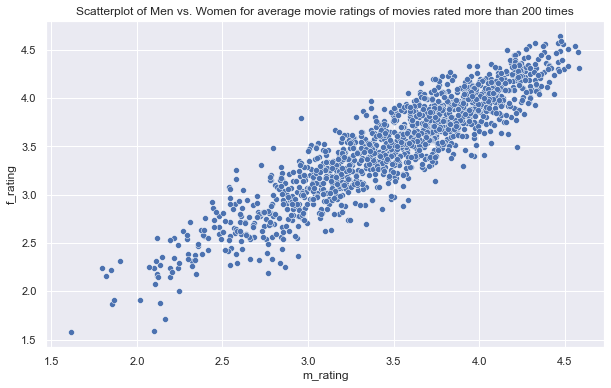

In [269]:
plt.figure(figsize=(10,6))

sns.set_theme(style="darkgrid")
sns.scatterplot(x='m_rating', y='f_rating', data=temp)
plt.title('Scatterplot of Men vs. Women for average movie ratings of movies rated more than 200 times')
plt.show()

#### (6 Points) Compute the correlation coefficent between the ratings of men and women.
#### What do you observe?
#### Are the ratings similiar or not? Support your answer with data!

In [270]:
no_nulls_temp.corr(method='pearson')

,movie_id,mean_F_rating,mean_M_rating
movie_id,1.000000,-0.056957,-0.033203
mean_F_rating,-0.056957,1.000000,0.763190
mean_M_rating,-0.033203,0.763190,1.000000


##### Yes, the ratings are positively correlated. So they are kind of similar.

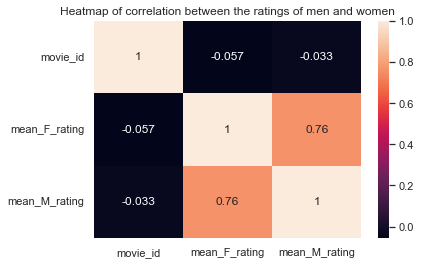

In [271]:
# heatmap of correlation
sns.heatmap(no_nulls_temp.corr(method='pearson'), annot=True)
plt.title("Heatmap of correlation between the ratings of men and women")
plt.show()

#### (10 Points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
#### For example, are men and women more similar when they are younger or older?
#### Be sure to come up with your own conjectures and support them with data!

Conjecture: Fantasy movies are usually received similary by both the genders. So these genres of movies can be recommended to both the genders.

In [272]:
# Creating a dataframe for Movies of genre Fantasy

temp=data[data.genres.str.contains("Fantasy")]


# Our temporary df
temp = pd.concat([
    temp[temp.gender == 'M'].groupby('movie_id').mean().rating,
    temp[temp.gender == 'F'].groupby('movie_id').mean().rating
], axis=1)

# Reformatting the dataframe a little bit
temp.columns = ['m_rating', 'f_rating']
temp.reset_index(inplace=True)

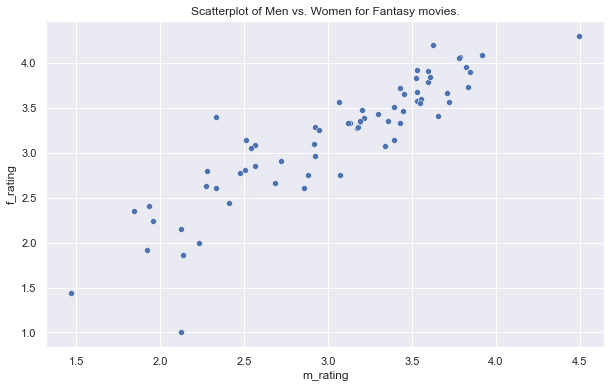

In [273]:
plt.figure(figsize=(10,6))

sns.set_theme(style="darkgrid")
sns.scatterplot(x='m_rating', y='f_rating', data=temp)
plt.title('Scatterplot of Men vs. Women for Fantasy movies.')
plt.show()

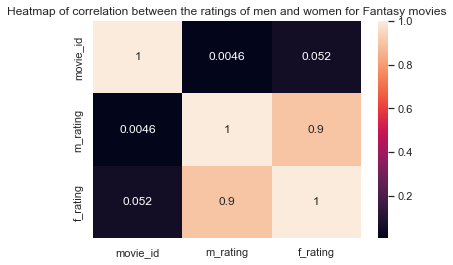

In [274]:
#Heatmap of correlation between the ratings of men and women for Fantasy movies
sns.heatmap(temp.corr(method='pearson'), annot=True)
plt.title("Heatmap of correlation between the ratings of men and women for Fantasy movies")
plt.show()

# Problem 4: (20 Points Total): Open Ended Question

* (6 Points) Do any of your conjectures in **Problems 1, 2, and 3** provide insights that a movie company might be interested in?
* (6 Points) Propose a business question that you think this data can answer.
* (8 Points) Suppose you are a Data Scientist at a movie company.  **Convince your boss that your conjecture is correct!**

#### (6 Points) Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?

Conjecture from Problem 1: Top 10 most popular movies are always recommended to all the user's who have not watched it, because these movies are most reviewed by the audience.

In [275]:
#Grouping data by movie names and getting count of each group
temp = data.groupby(['title','genres']).count()

#Keeping only one column age, which we rename into count cause that makes more sense
temp = pd.DataFrame(temp.age).reset_index()
temp.rename(columns={'age': 'count'}, inplace=True)

#Sorting it into descending order and returning top 10 the movie with maximum count
temp.sort_values(by='count', ascending=False).head(10)


,title,genres,count
127,American Beauty (1999),Comedy|Drama,3428
3153,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,2991
3154,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,2883
1789,Jurassic Park (1993),Action|Adventure|Sci-Fi,2672
2894,Saving Private Ryan (1998),Action|Drama|War,2653
3293,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,2649
2112,"Matrix, The (1999)",Action|Sci-Fi|Thriller,2590
258,Back to the Future (1985),Comedy|Sci-Fi,2583
2990,"Silence of the Lambs, The (1991)",Drama|Thriller,2578


Conjecture from Problem 2: Age group 56 are more into Film-Noir movies and Age group 1 are more into Children's movies can be used to recommend specific genres of movies based on user's age groups.

In [276]:
# Lets see if we could create a dataset where count of males and females are same
age_1 = data[data.age == 1].shape[0]

# Lets sample same number of age in random and create a new dataset
balanced = pd.concat([
    data[data.age == 1],
    data[data.age == 18].sample(age_1),
    data[data.age == 25].sample(age_1),
    data[data.age == 35].sample(age_1),
    data[data.age == 45].sample(age_1),
    data[data.age == 50].sample(age_1),
    data[data.age == 56].sample(age_1)
                                                       
])

balanced.shape

(190477, 10)

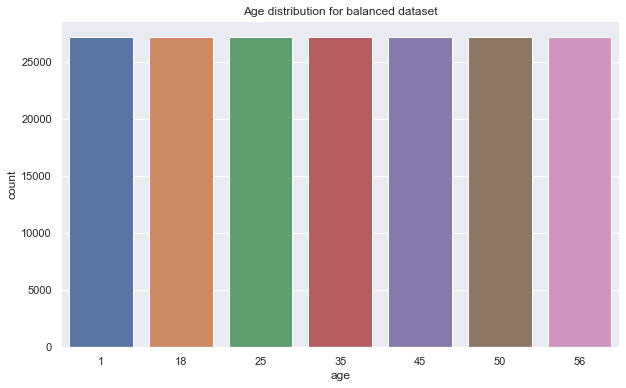

In [277]:
#Plotting the age brackets for the balanced dataset
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.countplot(x=balanced.age)
plt.title("Age distribution for balanced dataset")
plt.show()

Conjecture 1: Age group 56 are more into Film-Noir movies

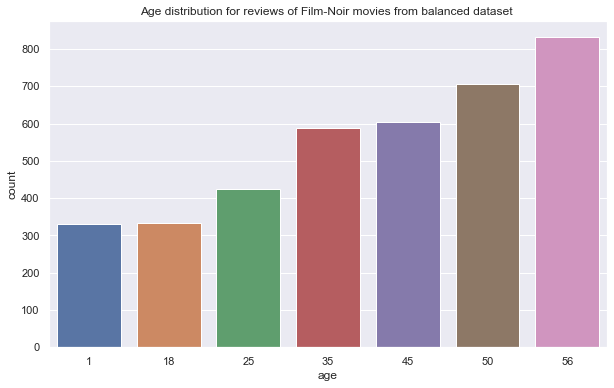

In [278]:
#Creating a subset of the dataframe only for Film-Noir movies
temp=balanced[balanced.genres.str.contains('Film-Noir')]

#Plotting the age brackets for only movies with genre Film-Noir
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.countplot(x=temp.age)
plt.title("Age distribution for reviews of Film-Noir movies from balanced dataset ")
plt.show()

Conjecture 2: Age group 1 are more into Children's movies

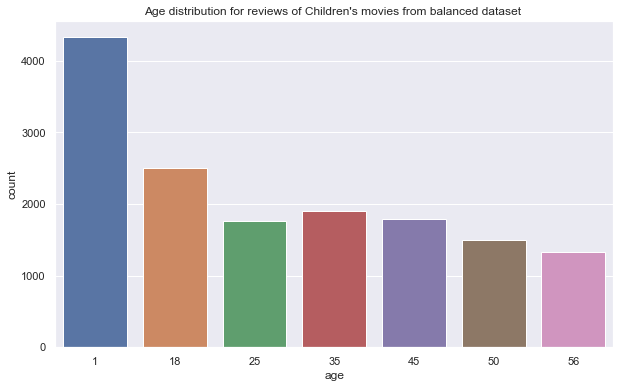

In [279]:
#Creating a subset of the dataframe only for Children's movies
temp=balanced[balanced.genres.str.contains("Children's")]

#Plotting the age brackets for only movies with genre Film-Noir
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.countplot(x=temp.age)
plt.title("Age distribution for reviews of Children's movies from balanced dataset ")
plt.show()

Conjecture from Problem 3: Fantasy movies are usually received similary by both the genders. So these genres of movies can be recommended to both the genders.

In [280]:
# Creating a dataframe for Movies of genre Fantasy

temp=data[data.genres.str.contains("Fantasy")]


# Our temporary df
temp = pd.concat([
    temp[temp.gender == 'M'].groupby('movie_id').mean().rating,
    temp[temp.gender == 'F'].groupby('movie_id').mean().rating
], axis=1)

# Reformatting the dataframe a little bit
temp.columns = ['m_rating', 'f_rating']
temp.reset_index(inplace=True)

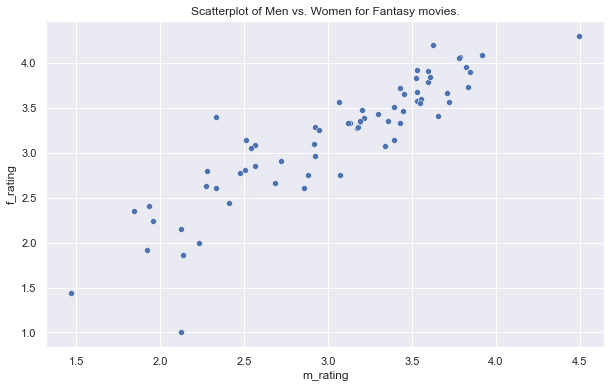

In [281]:
plt.figure(figsize=(10,6))

sns.set_theme(style="darkgrid")
sns.scatterplot(x='m_rating', y='f_rating', data=temp)
plt.title('Scatterplot of Men vs. Women for Fantasy movies.')
plt.show()

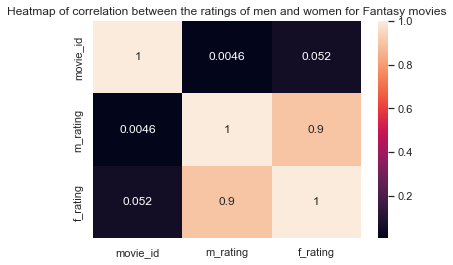

In [282]:
#Heatmap of correlation between the ratings of men and women for Fantasy movies
sns.heatmap(temp.corr(method='pearson'), annot=True)
plt.title("Heatmap of correlation between the ratings of men and women for Fantasy movies")
plt.show()

#### (6 Points) Propose a business question that you think this data can answer.

Which movies would a user be most interested in watching based on other users with similiar interests?

#### (8 Points) Suppose you are a Data Scientist at a movie company. Convince your boss that your conjecture is correct!

##### Movie Recommendation with Collaborative Filtering

Building a robust movie recommendation systems is higly important given the huge demand for personalized content of modern consumers.

An example of recommendation system is such as this:

* User 1 watches 'The Dark Knight' and 'Man of Steel'.
* User 2 does search on 'The Dark Knight', then the system suggests 'Man of Steel' from data collected about user 1.

Collaborative Filtering is an ubiquitous type of personalized recommendation systems. 

#### Looking into each of the dataframes

Data exploration of movies dataframe

In [283]:
#Viewing movies
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [284]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


We can clearly see that there are **3883** movies in total

We can also see that the title contains the year of publishing the movies. So we created a new column called **'Year'** which shows the year the movie got published.

In [285]:
#Creating a new column 'Year'
movies['year']=movies.title.str[-5:-1].astype(int)

In [286]:
#Viewing the updated dataframe
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


We looked into the histogram of the year's movies were published

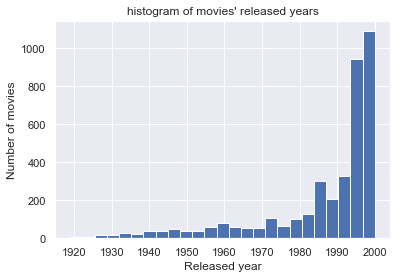

In [287]:
sns.set_theme(style="darkgrid")
movies.hist(column=['year'],bins=25)
plt.title("histogram of movies' released years")
plt.xlabel('Released year')
plt.ylabel('Number of movies')
plt.show()

From the histogram it is clear that our data contains movies in the range approx 1920 to 2000

As we have added Year to a new column, we must remove it from the title. 

In [288]:
#Removing year from the movies title
movies['title']=movies.title.str[0:-6]

In [289]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


Now let us visualize the different types of genres present in movies

		Frequency distribution of the different types of genres in the movies dataframe



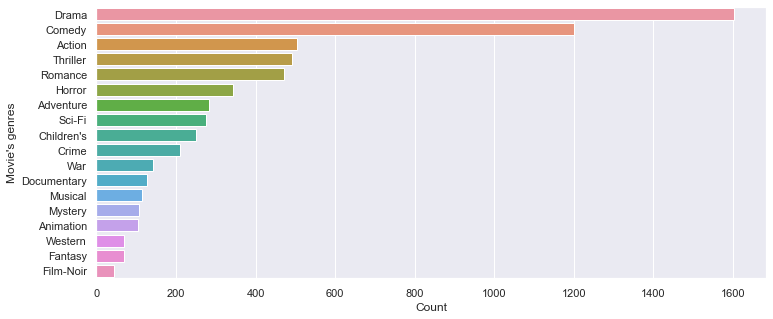

In [290]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    
    
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
#keyword_occurences[:5]

# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

    
wordsdf = pd.DataFrame({'genres':list(genres.keys()), 'count':list(genres.values())}) 

d = wordsdf.nlargest(columns="count",n=len(genres)) 
  
# visualize words and frequencies
plt.figure(figsize=(12,5)) 

print("\t\tFrequency distribution of the different types of genres in the movies dataframe\n")
sns.set_theme(style="darkgrid")
ax = sns.barplot(data=d, x= "count", y = "genres") 
ax.set(ylabel = "Movie's genres")
ax.set(xlabel = "Count") 

plt.show()

		WordCloud of the different types of genres in the movies dataframe



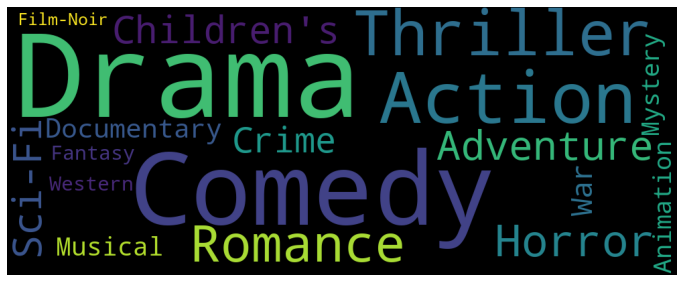

In [291]:
from wordcloud import WordCloud

# Create the wordcloud of the genres
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(12, 5))
print("\t\tWordCloud of the different types of genres in the movies dataframe\n")
plt.imshow(genre_wordcloud)
plt.axis('off')
plt.show()

Data exploration of ratings dataframe

In [292]:
#Viewing ratings
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Dropping the timestamp value as it is unessassary to our analysis.

In [293]:
ratings.drop(['timestamp'], axis=1,inplace=True)

In [294]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


We can clearly see that there are **1000209** ratings in total

Data exploration of user's dataframe

In [295]:
#Viewing users
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [296]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip         6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


We can clearly see that there are **6040** users in total

We looked into the histogram for user's age

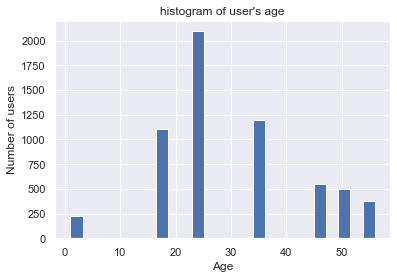

In [297]:
sns.set_theme(style="darkgrid")
users.hist(column=['age'],bins=25)
plt.title("histogram of user's age")
plt.xlabel("Age")
plt.ylabel("Number of users")
plt.show()

Now we wanted the format of Ratings matrix to be one row per user and one column per movie. To do so, we pivot ratings to get that and call the new variable Ratings.

In [298]:
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Then we de-normalized the data (normalize by each users mean) and convert it from a dataframe to a numpy array.

In [299]:
R = Ratings.values
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

With the ratings matrix properly formatted and normalized, we did some dimensionality reduction

We checked the sparsity of the ratings dataset.

In [300]:
sparsity = round(1.0 - len(ratings) / float(len(users) * len(movies)), 3)
print('The sparsity level of MovieLens1M dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of MovieLens1M dataset is 95.7%


##### Setting Up SVD

We used the Scipy function svds because it allows to choose how many latent factors we want to use to approximate the original ratings matrix (instead of having to truncate it after).

In [301]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

As we are going to leverage matrix multiplication to get predictions, we convert the Σ (now are values) to the diagonal matrix form.



In [302]:
sigma = np.diag(sigma)

##### Making Predictions from the Decomposed Matrices

We need to add the user means back to get the actual star ratings prediction.

In [303]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

With the predictions matrix for every user, we can build a function to recommend movies for any user. we return the list of movies the user has already rated, for the sake of comparison.

In [304]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


We write a function to return the movies with the highest predicted rating that the specified user hasn't already rated. 

In [305]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user_id == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

Let's try to recommend 20 movies for user with ID 6038.

In [306]:
already_rated, predictions = recommend_movies(preds, 6038, movies, ratings, 20)

User 6038 has already rated 20 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [307]:
# Top 20 movies that User 6038 has rated 
already_rated.head(20)

,user_id,movie_id,rating,title,genres,year
19,6038,1079,5,"Fish Called Wanda, A",Comedy,1988
2,6038,3088,5,Harvey,Comedy,1950
13,6038,1296,5,"Room with a View, A",Drama|Romance,1986
11,6038,1223,5,"Grand Day Out, A",Animation|Comedy,1992
5,6038,1148,5,"Wrong Trousers, The",Animation|Comedy,1993
6,6038,1183,5,"English Patient, The",Drama|Romance|War,1996
8,6038,3548,4,Auntie Mame,Comedy|Drama,1958
9,6038,356,4,Forrest Gump,Comedy|Romance|War,1994
0,6038,1419,4,Walkabout,Drama,1971
7,6038,2146,4,St. Elmo's Fire,Drama|Romance,1985


In [308]:
# Top 20 movies that User 6038 hopefully will enjoy
predictions

,movie_id,title,genres,year
733,745,"Close Shave, A",Animation|Comedy|Thriller,1995
709,720,Wallace & Gromit: The Best of Aardman Animation,Animation,1996
3662,3751,Chicken Run,Animation|Children's|Comedy,2000
1171,1196,Star Wars: Episode V - The Empire Strikes Back,Action|Adventure|Drama|Sci-Fi|War,1980
1248,1278,Young Frankenstein,Comedy|Horror,1974
3582,3671,Blazing Saddles,Comedy|Western,1974
3341,3429,Creature Comforts,Animation|Comedy,1990
1060,1080,Monty Python's Life of Brian,Comedy,1979
256,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1977
1264,1294,M*A*S*H,Comedy|War,1970


These seem like pretty good recommendations. It's good to see that, although we didn't actually use the genre of the movie as a feature, the truncated matrix factorization features "picked up" on the underlying tastes and preferences of the user. We have recommended some action, comedy, drama, and romance movies - all of which were genres of some of this user's top rated movies.

#### Model Evaluation

Instead of doing manually we used the Surprise library that provides various ready-to-use powerful prediction algorithms including (SVD) to evaluate its RMSE (Root Mean Squared Error) on the MovieLens dataset. 

In [309]:
pip install surprise

Note: you may need to restart the kernel to use updated packages.


In [310]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import *

In [311]:
# Import libraries from Surprise package
#from surprise import Reader, Dataset, SVD, evaluate

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)
svd = SVD()

# Split the dataset for 5-fold evaluation
cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8745  0.8758  0.8733  0.8738  0.8741  0.8743  0.0008  
Fit time          40.31   40.68   40.51   40.39   40.42   40.46   0.13    
Test time         1.18    1.34    1.33    1.30    1.19    1.27    0.07    


{'test_rmse': array([0.87453158, 0.87577789, 0.87328517, 0.87377327, 0.87413618]),
 'fit_time': (40.309590101242065,
  40.67920207977295,
  40.51242709159851,
  40.387563943862915,
  40.415427923202515),
 'test_time': (1.182499885559082,
  1.3377859592437744,
  1.3276429176330566,
  1.2994439601898193,
  1.19435715675354)}

We get a mean Root Mean Square Error of approx **0.87** which is pretty good.

We will pick again user with ID 6038 and check the ratings he has given.

In [312]:
trainset = data.build_full_trainset()
svd.fit(trainset)
ratings[ratings['user_id'] == 6038]

,user_id,movie_id,rating
999725,6038,1419,4
999726,6038,920,3
999727,6038,3088,5
999728,6038,232,4
999729,6038,1136,4
999730,6038,1148,5
999731,6038,1183,5
999732,6038,2146,4
999733,6038,3548,4
999734,6038,356,4


We used SVD to predict the rating that User with ID 6038 will give to it some random movies from a sample

In [313]:
svd.predict(6038, 745).est

4.421901099879369

In [314]:
est_rating = []
for i in predictions['movie_id']:
    t=movies[movies.movie_id==i]
    est_rating.append(round(svd.predict(6038, i).est, 2))
    #print("\nMovie:\t",t.title.values[0], "Estimated Rating:", round(svd.predict(6038, i).est, 2))
    
predictions['Estimated Rating'] = est_rating
predictions

,movie_id,title,genres,year,Estimated Rating
733,745,"Close Shave, A",Animation|Comedy|Thriller,1995,4.42
709,720,Wallace & Gromit: The Best of Aardman Animation,Animation,1996,4.21
3662,3751,Chicken Run,Animation|Children's|Comedy,2000,3.13
1171,1196,Star Wars: Episode V - The Empire Strikes Back,Action|Adventure|Drama|Sci-Fi|War,1980,3.92
1248,1278,Young Frankenstein,Comedy|Horror,1974,3.88
3582,3671,Blazing Saddles,Comedy|Western,1974,3.81
3341,3429,Creature Comforts,Animation|Comedy,1990,4.24
1060,1080,Monty Python's Life of Brian,Comedy,1979,3.97
256,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1977,4.21
1264,1294,M*A*S*H,Comedy|War,1970,3.93


In [315]:
print("Average Estimated Rating", predictions['Estimated Rating'].mean())

Average Estimated Rating 3.8855000000000004
